<a href="https://colab.research.google.com/github/yamada-github-account/LearnBayesNN/blob/master/AnalyticGauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd


%matplotlib inline

In [2]:
class Gauss:
    def __init__(self,mu):
        self.a = 0
        self.b = 1
        self.mu = mu

    def fit(self,data):
        data = tf.reshape(tf.convert_to_tensor(data),[-1])
        N = data.shape[0]
        self.a += N/2
        self.b += int(tf.reduce_sum(tf.square(data-self.mu))/2)

    def plot_prob(self):
        gamma = tfd.Gamma(self.a,self.b)
        x = np.linspace(0,1,1000)
        y = gamma.prob(x)
        plt.plot(x,y)
        plt.title(r"$p\left (\sigma ^{-2}\|x\right)$ for Gauss$\left(x\|\mu ,\sigma ^2\right)$")
        plt.show()

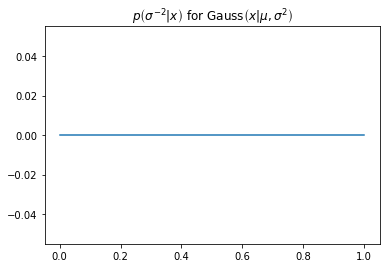

In [3]:
g = Gauss(0)

# 無情報事前分布をプロット
g.plot_prob()

In [4]:
# 推定対象の真の分布を作成
gaus = tfd.Normal(0,2)

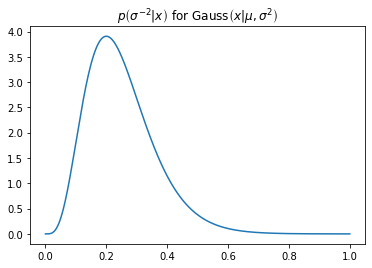

In [5]:
# 真の分布から10個のサンプルを生成し、ベイズ推論
g.fit(gaus.sample(10))

# 事後分布をプロット
g.plot_prob()

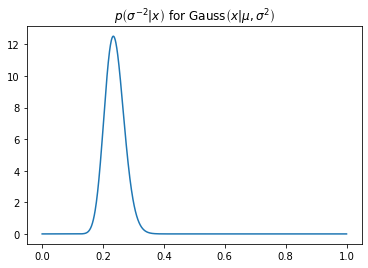

In [6]:
# 更に追加で、真の分布から100個のサンプルを生成し、ベイズ推論
g.fit(gaus.sample(100))

# 事後分布をプロット
g.plot_prob()